In [1]:
# Final Project - Machine Learning - Task 3
# Following Customer Segmentation and applying the predictive model for churn prediction
# We are going to produce a report with marketing recommendations for this online retail company
# Authors
# Jeevanthi Panawala
# Sreedharani

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [26]:
# Load the churn prediction dataset created by applying the churn prediction model in Task 2
df=pd.read_csv("../Data/churn_probabilities.csv")
df.head()

,Customer ID,Recency,Amount,frequency,Recency_Log,Amount_Log,frequency_Log,Archetype,Churn,Archetype_Value,churn_probability
0,12346.0,134,77556.46,34,4.905275,11.258774,3.555348,Loyal Luxury Shoppers,1,0,0.672486
1,12347.0,55,3146.75,155,4.025352,8.054443,5.049856,Loyal Luxury Shoppers,0,0,0.114948
2,12348.0,57,1709.40,48,4.060443,7.444483,3.891820,Lost Luxury Shoppers,0,2,0.256723
3,12349.0,216,2671.14,102,5.379897,7.890635,4.634729,Lost Luxury Shoppers,0,2,0.388233
4,12350.0,118,334.40,17,4.779123,5.815324,2.890372,Long Lost Rare Shoppers,1,3,0.641128


In [ ]:
#----------------------------- Analysis of Archetype Distributions-------------------------------#

C:\Users\ME\AppData\Local\Temp\ipykernel_12580\240013093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


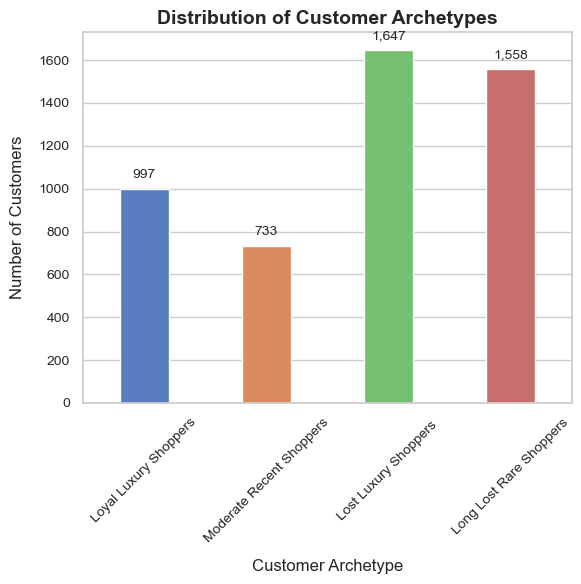

In [59]:

# Sort the DataFrame based on Archetype_Value
df_sorted = df.sort_values(by='Archetype_Value')

# Create the plot
plt.figure(figsize=(6, 6))  
sns.set_theme(style="whitegrid")  # Set a clean style
ax = sns.countplot(
    x='Archetype',
    data=df_sorted,
    order=df_sorted['Archetype'].unique(),
    palette="muted",
    width=0.4
)

# Add counts above bars
for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ","),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 10), textcoords='offset points',
        fontsize=10
    )

# Add title and labels with enhanced formatting
plt.title('Distribution of Customer Archetypes', fontsize=14, fontweight='bold')
plt.xlabel('Customer Archetype', fontsize=12, labelpad=10)
plt.ylabel('Number of Customers', fontsize=12, labelpad=10)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.savefig("figures/archetypedistribution.png", format='png')
plt.show()


In [11]:
# The archetype distribution shows that 
# 20% of the total customers are luxury customers who shop frequently
# There are around 15% of customers that purchase goods of moderate value and prospective ones to be converted into loyal luxury customers
# Around 30% have been loyal luxury customers but now they have stopped purchasing
# Another 30% has been there who haven;t add much value to the business and churned now

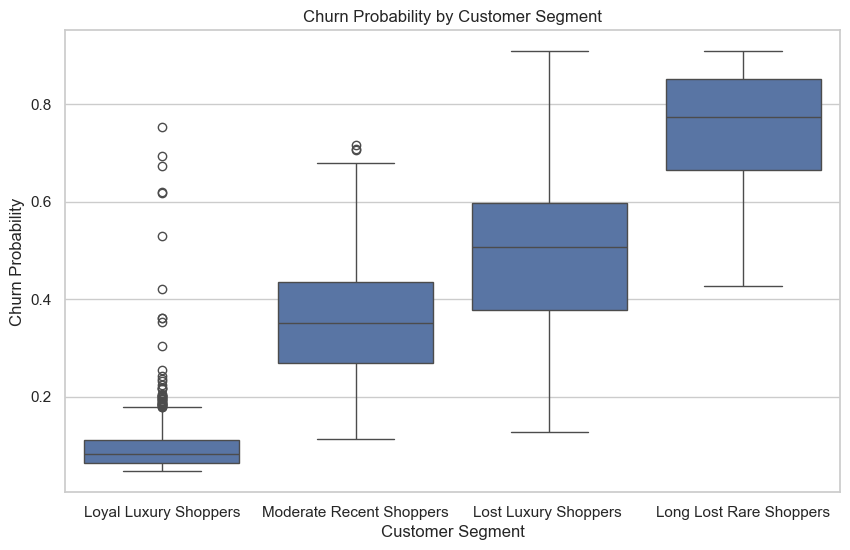

In [28]:
# Analyzing the Churn Probability by customer archetype
plt.figure(figsize=(10, 6))
sns.boxplot(x='Archetype', y='churn_probability', data=df_sorted)
plt.title('Churn Probability by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Churn Probability')
plt.savefig('churn.png', dpi=300, bbox_inches='tight')

plt.show()


In [15]:
# Intepretation of Churn Probability by customer archetype Graph
#-----------------------------------------------Loyal Luxury Shppers------------------------------------#

# Median churn probability is very low.
# Majority of the customers in this segment have churn probabilities close to 0.
# A few outliers exist with higher churn probabilities, but they are exceptions.
# This group is the most stable and loyal, requiring minimal intervention.

#-------------------------------------------- Moderate Recent Shoppers----------------------------------#
# Median churn probability is moderate.
# The distribution shows that some customers have a relatively high risk of churning, with a wide interquartile range.
# There are no extreme outliers.
# This segment could benefit from targeted retention strategies like offers or personalized engagement to reduce churn risk.

#-------------------------------------------- Lost Luxury Shoppers---------------------------------------#
# Median churn probability is higher compared to the first two segments.
# The majority of customers in this group show a significant risk of churn, as indicated by the higher values of the interquartile range.
# This group is at high risk of churning and may require aggressive marketing campaigns,
# like exclusive discounts or re-engagement emails, to win them back

#---------------------------------------------- Long Lost Rare Shoppers----------------------------------#
# Median churn probability is the highest of all segments.
# There are fewer variations within the group, but the overall probabilities indicate a strong likelihood of churn for most customers.
# A few outliers exist with very low churn probabilities.
# This group is the hardest to retain. 
# Marketers might need to decide whether to focus resources on re-engaging these customers or accept them as lost customers.


In [29]:
# We decided to focus on re-engaging Lost Luxury Shoppers.
# We thought that the shoppers with high frequency and low recency woold be easy to reengage
# And it is worth to allocate the resources to renegage the customers who have spent considerably high amounts

# So we decided to further analyze purchase patterns of Lost Luxury Shoppers with high risk of churn
# And with the recency less than 6 months and frequency >20 and amount> median amount of the cluster

lost_luxury_shoppers = df[df['Archetype_Value'] == 2]
lost_luxury_shoppers.shape

(1647, 11)

In [30]:
lost_luxury_shoppers['Amount'].median()

1056.11

In [31]:

df_high_churn_risk = lost_luxury_shoppers[
    (lost_luxury_shoppers['churn_probability'] > 0.5) & 
    (lost_luxury_shoppers['Recency'] < 180) &
    (lost_luxury_shoppers['frequency'] > 20)&
    (lost_luxury_shoppers['Amount'] > lost_luxury_shoppers['Amount'].median())

]


In [32]:
df_high_churn_risk.shape

(11, 11)

In [33]:
df_high_churn_risk.head()

,Customer ID,Recency,Amount,frequency,Recency_Log,Amount_Log,frequency_Log,Archetype,Churn,Archetype_Value,churn_probability
25,12373.0,120,1127.65,51,4.795791,7.028778,3.951244,Lost Luxury Shoppers,1,2,0.513680
337,12785.0,173,1100.40,56,5.159055,7.004337,4.043051,Lost Luxury Shoppers,1,2,0.508849
382,12842.0,117,1109.73,28,4.770685,7.012773,3.367296,Lost Luxury Shoppers,0,2,0.524407
1683,14414.0,167,1119.55,29,5.123964,7.021575,3.401197,Lost Luxury Shoppers,0,2,0.532171
2733,15661.0,126,1215.95,44,4.844187,7.104103,3.806662,Lost Luxury Shoppers,1,2,0.524005


In [ ]:
# There are 11 customers that the marketing team should focus on to re-engage
# Seasonal buying patters of this customer segment, are studied

In [34]:
# Join df_high_churn_risk with cleaned transaction data
df_transactions=pd.read_csv('../Data/refined_data.csv')
df_transactions.shape

(805620, 8)

In [35]:
# Filter transactions that belong to the Lost Luxury Customers with High Churn Risk
# Inner Join two dataframes on Customer ID

lost_luxury_df = pd.merge(df_high_churn_risk, df_transactions, on='Customer ID', how='inner')
lost_luxury_df.shape

(553, 18)

In [36]:
lost_luxury_df = lost_luxury_df[df_transactions.columns]
lost_luxury_df.shape

(553, 8)

In [37]:
lost_luxury_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,496864,POST,POSTAGE,2,2010-02-04 12:08:00,40.00,12373.0,Austria
1,496864,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,2010-02-04 12:08:00,2.95,12373.0,Austria
2,496864,21936,RED/WHITE SPOT PICNIC BAG,5,2010-02-04 12:08:00,2.95,12373.0,Austria
3,496864,21077,SET/20 WOODLAND PAPER NAPKINS,12,2010-02-04 12:08:00,0.85,12373.0,Austria
4,496864,21080,SET/20 RED SPOTTY PAPER NAPKINS,12,2010-02-04 12:08:00,0.85,12373.0,Austria


In [38]:
lost_luxury_df['Purchase_Amount']=lost_luxury_df['Quantity']*lost_luxury_df['Price']
lost_luxury_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Purchase_Amount
0,496864,POST,POSTAGE,2,2010-02-04 12:08:00,40.00,12373.0,Austria,80.00
1,496864,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,2010-02-04 12:08:00,2.95,12373.0,Austria,17.70
2,496864,21936,RED/WHITE SPOT PICNIC BAG,5,2010-02-04 12:08:00,2.95,12373.0,Austria,14.75
3,496864,21077,SET/20 WOODLAND PAPER NAPKINS,12,2010-02-04 12:08:00,0.85,12373.0,Austria,10.20
4,496864,21080,SET/20 RED SPOTTY PAPER NAPKINS,12,2010-02-04 12:08:00,0.85,12373.0,Austria,10.20


In [39]:
lost_luxury_df['InvoiceDate'] = pd.to_datetime(lost_luxury_df['InvoiceDate'], errors='coerce')

In [40]:
# Extract Month and Season
lost_luxury_df['Month'] = lost_luxury_df['InvoiceDate'].dt.month
lost_luxury_df['Year'] = lost_luxury_df['InvoiceDate'].dt.year
lost_luxury_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Purchase_Amount,Month,Year
0,496864,POST,POSTAGE,2,2010-02-04 12:08:00,40.00,12373.0,Austria,80.00,2,2010
1,496864,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,2010-02-04 12:08:00,2.95,12373.0,Austria,17.70,2,2010
2,496864,21936,RED/WHITE SPOT PICNIC BAG,5,2010-02-04 12:08:00,2.95,12373.0,Austria,14.75,2,2010
3,496864,21077,SET/20 WOODLAND PAPER NAPKINS,12,2010-02-04 12:08:00,0.85,12373.0,Austria,10.20,2,2010
4,496864,21080,SET/20 RED SPOTTY PAPER NAPKINS,12,2010-02-04 12:08:00,0.85,12373.0,Austria,10.20,2,2010


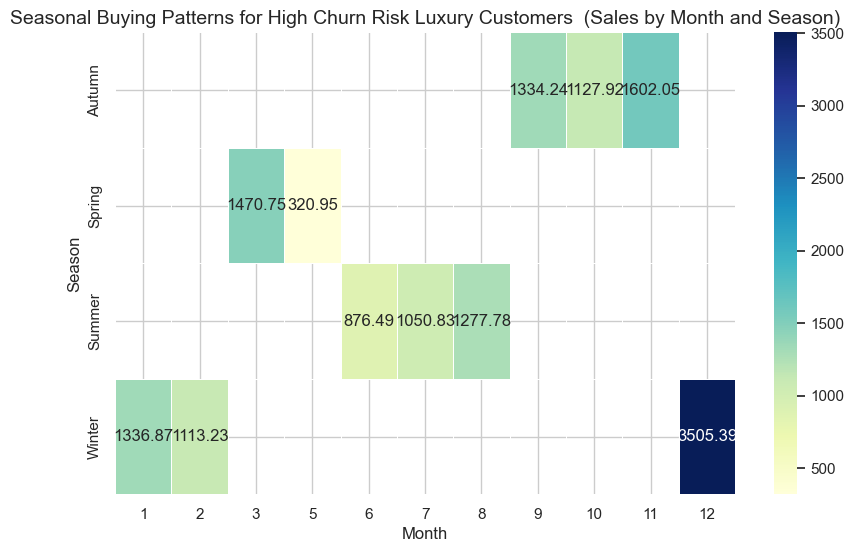

In [60]:
# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

lost_luxury_df['Season'] = lost_luxury_df['Month'].apply(get_season)

# Aggregate sales by season and month
seasonal_sales = lost_luxury_df.groupby(['Season', 'Month'])['Purchase_Amount'].sum().unstack()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(seasonal_sales, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.title('Seasonal Buying Patterns for High Churn Risk Luxury Customers  (Sales by Month and Season)', fontsize=14)
plt.ylabel('Season', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.savefig("figures/seasonal.png", format='png')
plt.show()


In [ ]:
# Seasonal buying patterns reveals that the Buying Peak of "Lost Luxury Shoppers" customer segment with High Churn Risk
# is December (Start of the WInter)
# In autumn months, their purchasing amount shows an upward trend.
# So if marketing campaigns are carried out for re-engaging "Lost Luxury Shoppers" with "High Churn Risk"
# Start of Autumn (September) is a good choise to kick off.


In [ ]:
#--------------Analysis of the Top Selling Products within High Risk Lost Luxury Shoppers in Autumn and Winter-------------#

In [42]:
df_winter_products = lost_luxury_df[(lost_luxury_df['Season'] == 'Winter') | (lost_luxury_df['Season'] == 'Autumn')]

df_winter_products.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Purchase_Amount,Month,Year,Season
0,496864,POST,POSTAGE,2,2010-02-04 12:08:00,40.00,12373.0,Austria,80.00,2,2010,Winter
1,496864,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,2010-02-04 12:08:00,2.95,12373.0,Austria,17.70,2,2010,Winter
2,496864,21936,RED/WHITE SPOT PICNIC BAG,5,2010-02-04 12:08:00,2.95,12373.0,Austria,14.75,2,2010,Winter
3,496864,21077,SET/20 WOODLAND PAPER NAPKINS,12,2010-02-04 12:08:00,0.85,12373.0,Austria,10.20,2,2010,Winter
4,496864,21080,SET/20 RED SPOTTY PAPER NAPKINS,12,2010-02-04 12:08:00,0.85,12373.0,Austria,10.20,2,2010,Winter


In [43]:
# Top products for each season
top_products_season = df_winter_products.groupby(['StockCode','Description'])['Quantity'].sum().reset_index()
top_products_season = top_products_season.sort_values(['Quantity'], ascending=[False])

# Filter top 20 products for each season
df_top_Products = top_products_season.head(20)
print(df_top_Products)


    StockCode                         Description  Quantity
130     22469               HEART OF WICKER SMALL       280
28      20984           12 PENCILS TALL TUBE POSY       240
95      22086     PAPER CHAIN KIT 50'S CHRISTMAS        172
266    85123A  WHITE HANGING HEART T-LIGHT HOLDER       148
236     82580                 BATHROOM METAL SIGN       108
129     22464         HANGING METAL HEART LANTERN        96
171     22740                        POLKADOT PEN        96
9       20677                    PINK SPOTTY BOWL        72
160     22633              HAND WARMER UNION JACK        72
7       20675                    BLUE SPOTTY BOWL        72
248     84827  ASS DES PHONE SPONGE CRAFT STICKER        60
19      20728                 LUNCH BAG CARS BLUE        50
38      21114       LAVENDER SCENTED FABRIC HEART        50
25      20961             STRAWBERRY BATH SPONGE         50
93      22080              RIBBON REEL POLKADOTS         50
98      22112          CHOCOLATE HOT WAT

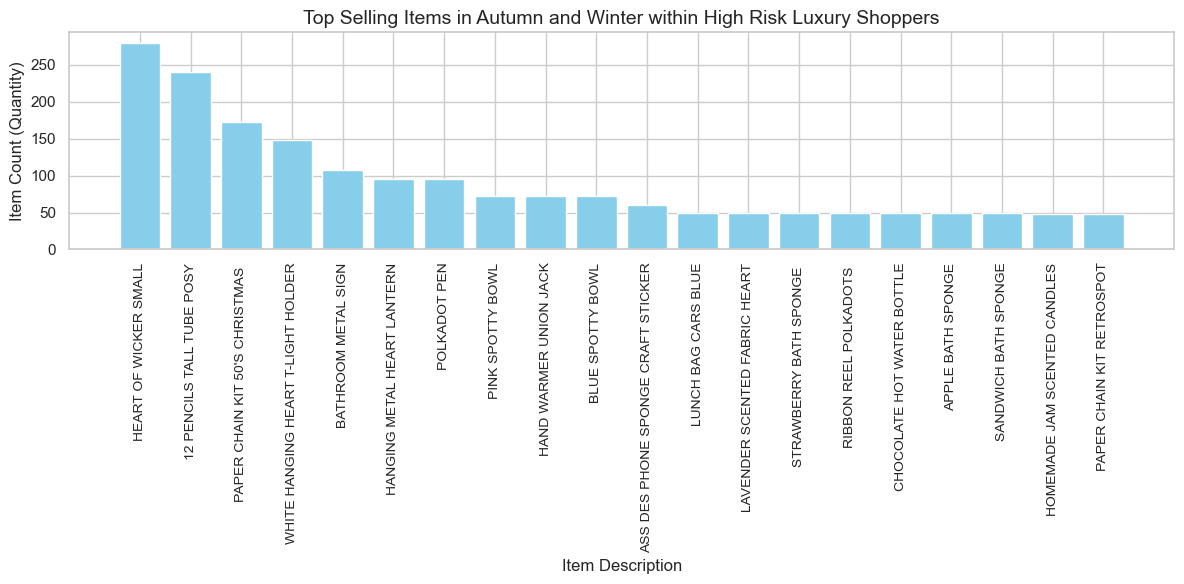

In [44]:
# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_top_Products["Description"], df_top_Products["Quantity"], color='skyblue')
plt.xlabel("Item Description", fontsize=12)
plt.ylabel("Item Count (Quantity)", fontsize=12)
plt.title("Top Selling Items in Autumn and Winter within High Risk Luxury Shoppers", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#-------- Market Basket Analysis of the above top selling products---------------------------------------#

In [ ]:
#---- This will help to identify products for promotions targetting High Risk Luxury Shoppers, starting from Autumn---------#
# If we find that there are combinations of products bought together, marketers can bundle them and promote
# We will be using FP Growth Algorithm and mlxtend Framework
# Reference : D. Sarkar, R. Bali, and T. Sharma, Practical Machine Learning with Python. 2017. doi: 10.1007/978-1-4842-3207-1.

In [49]:
# Inner join df_top_Products and df_winter_products on StockCode
market_basket_df = pd.merge(df_top_Products, df_winter_products, on='StockCode', how='inner')
market_basket_df.head()

,StockCode,Description_x,Quantity_x,Invoice,Description_y,Quantity_y,InvoiceDate,Price,Customer ID,Country,Purchase_Amount,Month,Year,Season
0,22469,HEART OF WICKER SMALL,280,525280,HEART OF WICKER SMALL,40,2010-10-05 08:01:00,1.45,15661.0,United Kingdom,58.00,10,2010,Autumn
1,22469,HEART OF WICKER SMALL,280,535079,HEART OF WICKER SMALL,40,2010-11-25 08:21:00,1.45,15661.0,United Kingdom,58.00,11,2010,Autumn
2,22469,HEART OF WICKER SMALL,280,540173,HEART OF WICKER SMALL,80,2011-01-05 12:32:00,1.45,15661.0,United Kingdom,116.00,1,2011,Winter
3,22469,HEART OF WICKER SMALL,280,542235,HEART OF WICKER SMALL,120,2011-01-26 13:56:00,1.45,15661.0,United Kingdom,174.00,1,2011,Winter
4,20984,12 PENCILS TALL TUBE POSY,240,565149,12 PENCILS TALL TUBE POSY,48,2011-09-01 14:13:00,0.29,14414.0,United Kingdom,13.92,9,2011,Autumn


In [51]:
market_basket_df.drop(columns=['Description_x','Quantity_x'])


,StockCode,Invoice,Description_y,Quantity_y,InvoiceDate,Price,Customer ID,Country,Purchase_Amount,Month,Year,Season
0,22469,525280,HEART OF WICKER SMALL,40,2010-10-05 08:01:00,1.45,15661.0,United Kingdom,58.00,10,2010,Autumn
1,22469,535079,HEART OF WICKER SMALL,40,2010-11-25 08:21:00,1.45,15661.0,United Kingdom,58.00,11,2010,Autumn
2,22469,540173,HEART OF WICKER SMALL,80,2011-01-05 12:32:00,1.45,15661.0,United Kingdom,116.00,1,2011,Winter
3,22469,542235,HEART OF WICKER SMALL,120,2011-01-26 13:56:00,1.45,15661.0,United Kingdom,174.00,1,2011,Winter
4,20984,565149,12 PENCILS TALL TUBE POSY,48,2011-09-01 14:13:00,0.29,14414.0,United Kingdom,13.92,9,2011,Autumn
5,20984,566169,12 PENCILS TALL TUBE POSY,192,2011-09-09 12:09:00,0.29,14414.0,United Kingdom,55.68,9,2011,Autumn
6,22086,489669,PAPER CHAIN KIT 50'S CHRISTMAS,120,2009-12-02 08:15:00,2.55,12842.0,United Kingdom,306.00,12,2009,Winter
7,22086,529806,PAPER CHAIN KIT 50'S CHRISTMAS,40,2010-10-31 10:45:00,2.55,12842.0,United Kingdom,102.00,10,2010,Autumn
8,22086,569147,PAPER CHAIN KIT 50'S CHRISTMAS,12,2011-09-30 15:33:00,2.95,12842.0,United Kingdom,35.40,9,2011,Autumn
9,85123A,569147,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-09-30 15:33:00,2.55,12842.0,United Kingdom,81.60,9,2011,Autumn


In [52]:
# Prepare the data for Market Basket Analysis
# We need to group by the 'Invoice' and 'Description_y' to create transactions
transactions = market_basket_df.groupby('Invoice')['Description_y'].apply(list).reset_index()

In [53]:
# Convert the transactions into the format needed for FP-Growth
te = TransactionEncoder()
te_ary = te.fit_transform(transactions['Description_y'])
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth using mlxtend
frequent_itemsets = fpgrowth(df_transactions, min_support=0.1, use_colnames=True)

# Display the results
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
    support                                           itemsets
0  0.107143                  (PAPER CHAIN KIT 50'S CHRISTMAS )
1  0.142857                              (LUNCH BAG CARS BLUE)
2  0.178571               (WHITE HANGING HEART T-LIGHT HOLDER)
3  0.250000                              (BATHROOM METAL SIGN)
4  0.142857                            (HEART OF WICKER SMALL)
5  0.142857                       (CHOCOLATE HOT WATER BOTTLE)
6  0.107143                      (HANGING METAL HEART LANTERN)
7  0.107143       (HEART OF WICKER SMALL, BATHROOM METAL SIGN)
8  0.107143  (HANGING METAL HEART LANTERN, BATHROOM METAL S...


In [ ]:
#----------- Analysis of Frequently bought Items -----------------------#
# Above results show that  BATHROOM METAL SIGN had appeared in 25% of transactions
# of High Risk Luxury Shoppers in Autumn and Winter
# All these 8 items have appeared in more than 10% of the transactions
# So these set of items can be focused in preparing sales promotions to re-engage Lost Luxury Customers

In [58]:
#-------------- Cross Selling-------------------------------------------#
 # (HEART OF WICKER SMALL, BATHROOM METAL SIGN) and (HANGING METAL HEART LANTERN, BATHROOM METAL SIGN)
# Itemsets are brought together in more than 10% of the transactions
# These sets can be better candidates for bundling together if the marketing team plans for product bundling in their promotions